In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
print('The classes of the mushroom dataset are ', np.unique(mushroom['class']))

The classes of the mushroom dataset are  ['e' 'p']


In [6]:
print('The shape of the mushroom dataset is', mushroom.shape)

The shape of the mushroom dataset is (8124, 23)


Visualization


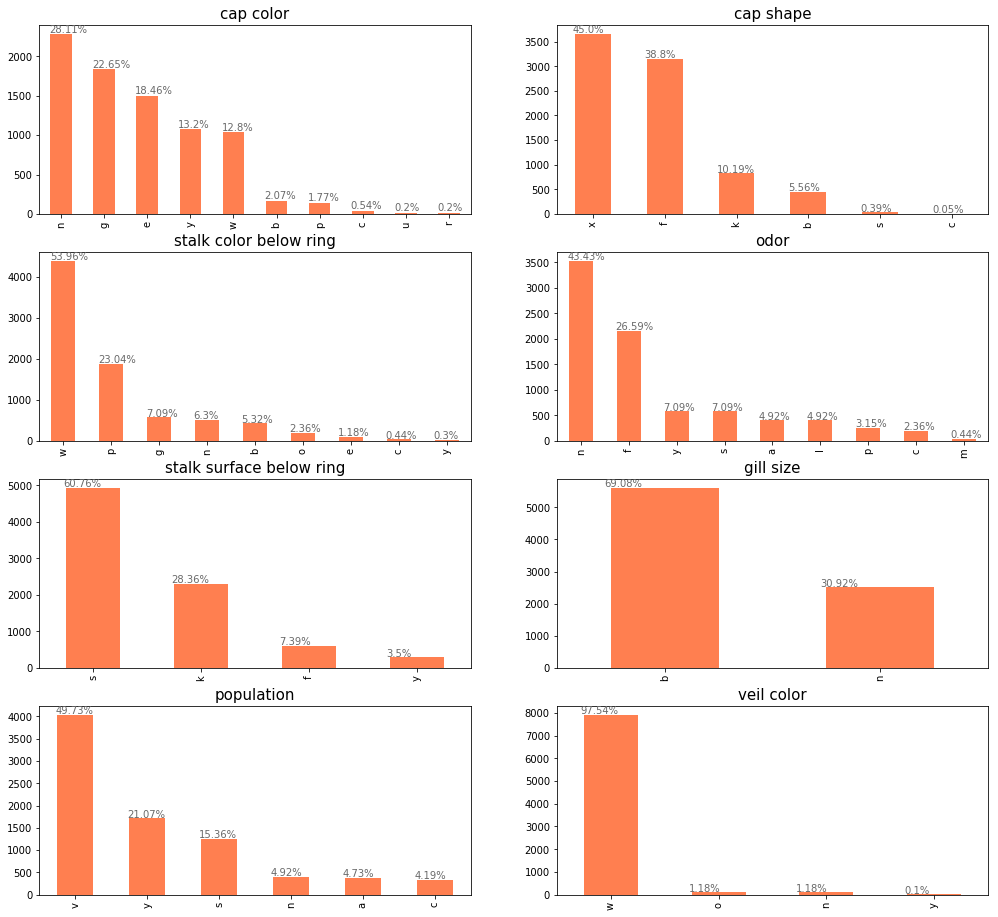

In [9]:
def mushroom_graph(name, ax):
    mushroom[name].value_counts().plot(kind='bar', ax=ax, color='coral')
    ax.set_alpha(0.8)
    ax.set_title(name.replace('-',' '),fontsize=15)
    
    totals=[]
    for i in ax.patches:
        totals.append(i.get_height())
        
    total= sum(totals)
    
    for i in ax.patches:
        ax.text(i.get_x()-.03, i.get_height()+20, str(round((i.get_height()/total)*100,2))+'%',fontsize=10,color='dimgrey')
fig1,ax1 = plt.subplots(4,2,figsize=(17,16))
mushroom_graph('cap-color',ax1[0,0])
mushroom_graph('cap-shape',ax1[0,1])
mushroom_graph('stalk-color-below-ring',ax1[1,0])
mushroom_graph('odor',ax1[1,1])
mushroom_graph('stalk-surface-below-ring',ax1[2,0])
mushroom_graph('gill-size',ax1[2,1])
mushroom_graph('population',ax1[3,0])
mushroom_graph('veil-color',ax1[3,1])


Modelling


In [11]:
y = mushroom['class']
X = mushroom.drop('class',axis=1)

In [15]:
X=pd.get_dummies(X)

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify = y)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))


Logistic Regression


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [22]:
from sklearn.metrics import accuracy_score

print('Accuracy score is %.2f' % accuracy_score(y_test, y_pred))

Accuracy score is 1.00
